1. CARGA DE DATOS Y PREPROCESAMIENTO (BREAST CANCER)
Dataset cargado: 569 muestras, 30 características
Clases: ['malignant' 'benign']
Valores nulos en X: 0

2. ANÁLISIS DE BALANCE DE CLASES
Distribución de clases:
   - malignant (0): 212 muestras
   - benign (1): 357 muestras
Conclusión: Los datos están razonablemente balanceados.

3. MATRIZ DE CORRELACIÓN


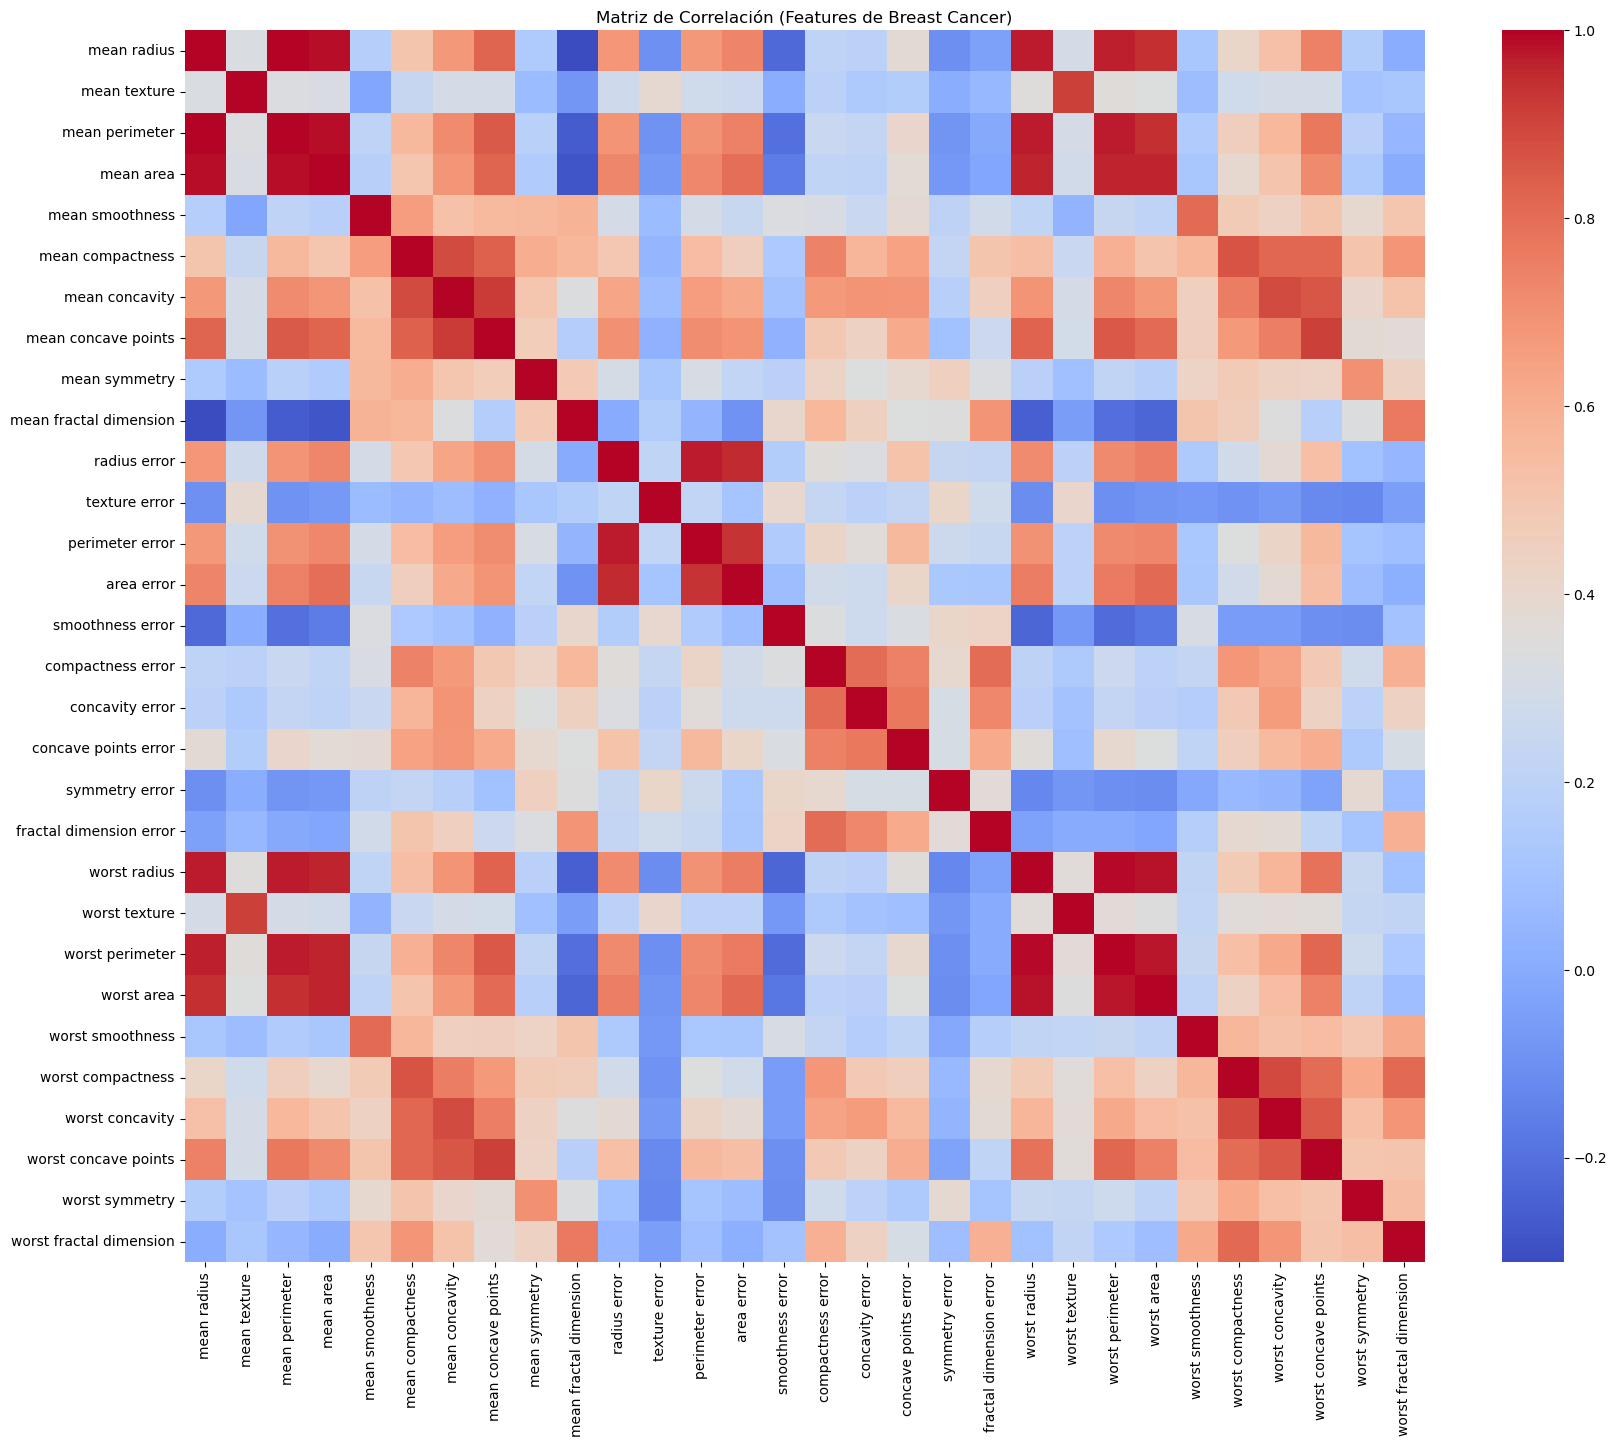

Nota: Muchas características están altamente correlacionadas (multicolinealidad).


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


from sklearn.datasets import load_breast_cancer


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


SEED = 42
np.random.seed(SEED)


print("=" * 60)
print("1. CARGA DE DATOS Y PREPROCESAMIENTO (BREAST CANCER)")
print("=" * 60)


data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names # (0 = 'malignant', 1 = 'benign')

print(f"Dataset cargado: {X.shape[0]} muestras, {X.shape[1]} características")
print(f"Clases: {target_names}")


print(f"Valores nulos en X: {np.isnan(X).sum()}")



print("\n" + "=" * 60)
print("2. ANÁLISIS DE BALANCE DE CLASES")
print("=" * 60)
counts = np.bincount(y)
print(f"Distribución de clases:")
print(f"   - {target_names[0]} (0): {counts[0]} muestras")
print(f"   - {target_names[1]} (1): {counts[1]} muestras")
print("Conclusión: Los datos están razonablemente balanceados.")


print("\n" + "=" * 60)
print("3. MATRIZ DE CORRELACIÓN")
print("=" * 60)


df_viz = pd.DataFrame(X, columns=feature_names)

plt.figure(figsize=(20, 16)) 
sns.heatmap(df_viz.corr(), annot=False, cmap='coolwarm', fmt=".1f")
plt.title('Matriz de Correlación (Features de Breast Cancer)')
plt.show()
print("Nota: Muchas características están altamente correlacionadas (multicolinealidad).")

In [10]:

print("\n" + "=" * 60)
print("4. DIVISIÓN DE DATOS")
print("=" * 60)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=SEED, 
    stratify=y
)
print(f"Tamaño de Entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño de Prueba: {X_test.shape[0]} muestras")



print("\n" + "=" * 60)
print("5. ESCALAMIENTO DE DATOS")
print("=" * 60)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Datos escalados (train y test) creados.")



print("\n" + "=" * 60)
print("6. EVALUANDO LOS 4 MODELOS")
print("=" * 60)


def evaluate_model(model, X_tr, X_ts, y_ts):
    model.fit(X_tr, y_train)
    pred = model.predict(X_ts)
    accuracy = accuracy_score(y_ts, pred)
    return accuracy, model 

resultados = {}
modelos_entrenados = {} 


nb_model = GaussianNB()
acc_nb, nb_model = evaluate_model(nb_model, X_train, X_test, y_test)
resultados['Naive Bayes'] = acc_nb
modelos_entrenados['Naive Bayes'] = (nb_model, 'original')


kmn_model = KNeighborsClassifier(n_neighbors=5)
acc_knn, kmn_model = evaluate_model(kmn_model, X_train_scaled, X_test_scaled, y_test)
resultados['KNN'] = acc_knn
modelos_entrenados['KNN'] = (kmn_model, 'escalado')


log_model = LogisticRegression(random_state=SEED)
acc_log, log_model = evaluate_model(log_model, X_train_scaled, X_test_scaled, y_test)
resultados['Regresión Logística'] = acc_log
modelos_entrenados['Regresión Logística'] = (log_model, 'escalado')

tree_model = DecisionTreeClassifier(random_state=SEED)
acc_tree, tree_model = evaluate_model(tree_model, X_train, X_test, y_test)
resultados['Árbol de Decisión'] = acc_tree
modelos_entrenados['Árbol de Decisión'] = (tree_model, 'original')

df_resultados = pd.DataFrame(list(resultados.items()), columns=['Modelo', 'Precisión'])
df_resultados = df_resultados.sort_values(by='Precisión', ascending=False)

print("\nPrecisión de los modelos (Dataset Breast Cancer):")
print(df_resultados.set_index('Modelo'))


4. DIVISIÓN DE DATOS
Tamaño de Entrenamiento: 398 muestras
Tamaño de Prueba: 171 muestras

5. ESCALAMIENTO DE DATOS
Datos escalados (train y test) creados.

6. EVALUANDO LOS 4 MODELOS

Precisión de los modelos (Dataset Breast Cancer):
                     Precisión
Modelo                        
Regresión Logística   0.988304
KNN                   0.959064
Naive Bayes           0.947368
Árbol de Decisión     0.918129



7. REPORTE DETALLADO DEL MEJOR MODELO
El mejor modelo es: Regresión Logística (Precisión: 0.9883)

 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        64
      benign       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

 MATRIZ DE CONFUSIÓN:


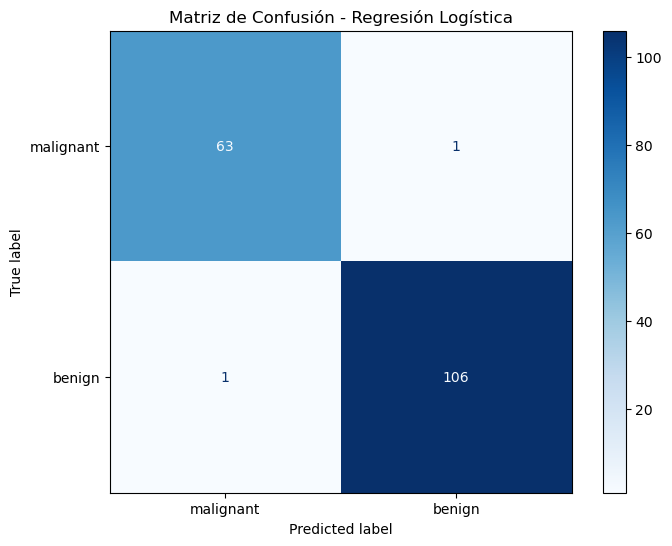

In [11]:

print("\n" + "=" * 60)
print("7. REPORTE DETALLADO DEL MEJOR MODELO")
print("=" * 60)


mejor_modelo_nombre = df_resultados.iloc[0]['Modelo']
mejor_modelo_obj, tipo_datos = modelos_entrenados[mejor_modelo_nombre]

print(f"El mejor modelo es: {mejor_modelo_nombre} (Precisión: {df_resultados.iloc[0]['Precisión']:.4f})")


X_test_final = X_test_scaled if tipo_datos == 'escalado' else X_test


y_pred = mejor_modelo_obj.predict(X_test_final)

print("\n REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test, y_pred, target_names=target_names))


print(" MATRIZ DE CONFUSIÓN:")
cm = confusion_matrix(y_test, y_pred, labels=mejor_modelo_obj.classes_)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.title(f'Matriz de Confusión - {mejor_modelo_nombre}')
plt.show()